In [43]:
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

In [44]:
data = pd.read_excel('data/all_features_v2_dataset_no_header.xlsx')

In [45]:
mlb = MultiLabelBinarizer(sparse_output=True)

X = data.iloc[:,0:13]  # features
y = data.iloc[:,-1]    # label column

new_y = []
for ako in y:
    new_y.append([ako])

y = mlb.fit_transform(new_y)
n_classes = 9

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X.to_numpy(), y, test_size=0.1, random_state=109)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print(mlb.classes_)

skf = StratifiedKFold(n_splits=10)

['Currency' 'DateTime' 'Event' 'Location' 'Nationality' 'Organization'
 'Person' 'PersonType' 'Thing']


In [46]:
t = time()

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0, max_iter=100000, C=10), n_jobs=5)
y_score = clf.fit(X_train_scaled, y_train).decision_function(X_test_scaled)
y_pred = clf.predict(X_test_scaled)

print('Time train: {} mins'.format(round((time() - t) / 60, 2)))

Time train: 45.68 mins


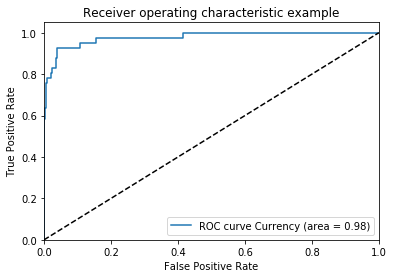

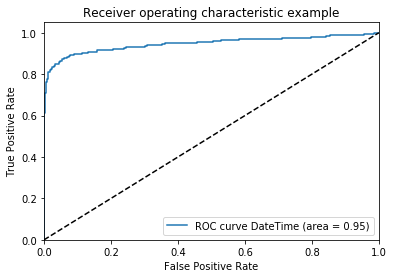

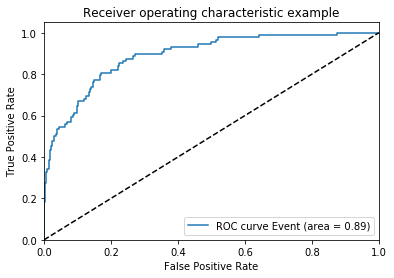

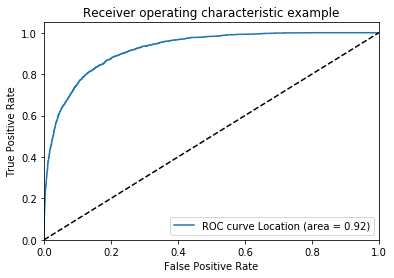

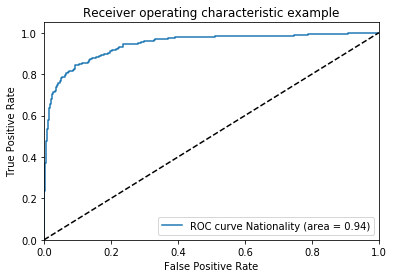

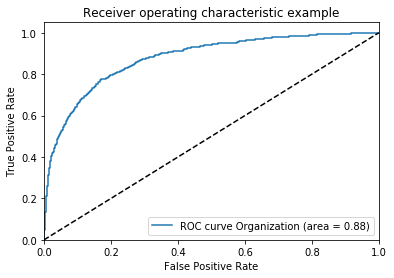

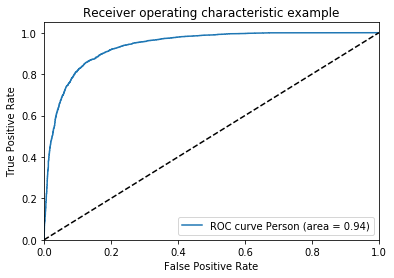

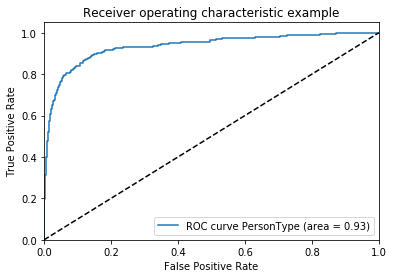

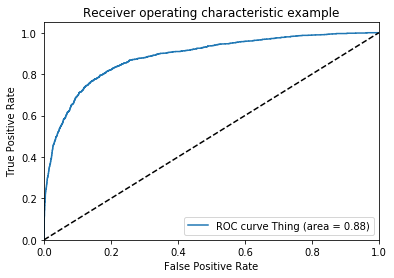

In [47]:
y_test_dense = y_test.todense()

#print(y_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_dense[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve '+mlb.classes_[i]+' (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [48]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import multilabel_confusion_matrix

print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', f1_score(y_test, y_pred, average='micro'))

Precision: 0.8113494809688582
Accuracy: 0.6164236706689536
Recall: 0.6284305317324185
F1 Score: 0.7082704041563462


In [49]:
import numpy as np
y_test_non_category = [ np.argmax(t) for t in y_test ]
y_predict_non_category = [ np.argmax(t) for t in y_pred ]

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)

print(conf_mat)

print("\n")
print(classification_report(y_test_non_category,y_predict_non_category))

[[  28    0    0    5    0    1    3    0    4]
 [  52  205    0    7    0    2   14    3   12]
 [  55    2    0    8    0    1    9    2   11]
 [ 463    0    0 1527    6    9  288    0    2]
 [ 117    0    0   38   42    1    8    1   15]
 [ 413    0    0  106    2   94   64   16   45]
 [ 422    0    0  210    0    3 3319    0   11]
 [ 192    0    0    7    0    3   42  140   43]
 [ 491   25    0   67    3   14  176   16  463]]


              precision    recall  f1-score   support

           0       0.01      0.68      0.02        41
           1       0.88      0.69      0.78       295
           2       0.00      0.00      0.00        88
           3       0.77      0.67      0.72      2295
           4       0.79      0.19      0.31       222
           5       0.73      0.13      0.22       740
           6       0.85      0.84      0.84      3965
           7       0.79      0.33      0.46       427
           8       0.76      0.37      0.50      1255

    accuracy           

C:\Users\JesterPC\anaconda3\envs\cse4062_conda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


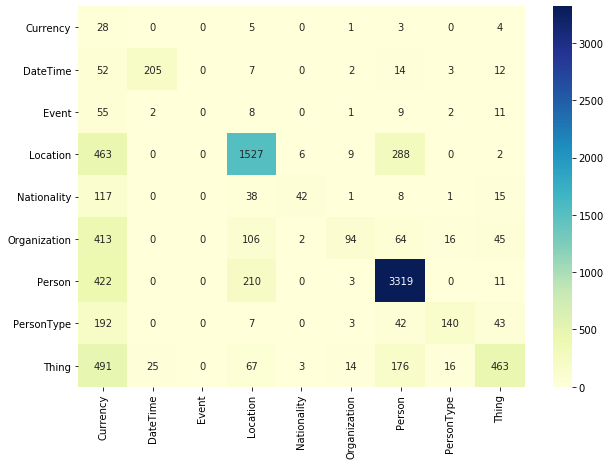

In [50]:
labels = ['Currency', 'DateTime', 'Event', 'Location', 'Nationality', 'Organization', 'Person', 'PersonType', 'Thing']

df_cm = pd.DataFrame(conf_mat, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")


In [51]:
cross_val_score_result = cross_val_score(clf, X_test, y_test, cv=10)

print(cross_val_score_result)

KeyboardInterrupt: 